# Project: Real Estate Price Prediction

In [429]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Set default figure size
plt.rcParams['figure.figsize'] = (12, 6)

In [430]:
# Load the dataset into a DataFrame
df = pd.read_csv('House_Data.csv')

# Display the first few rows of the DataFrame to verify the import
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [431]:
# Return the shape of the DataFrame in a professional way
rows, columns = df.shape
f"The DataFrame contains {rows} rows and {columns} columns."

'The DataFrame contains 13320 rows and 9 columns.'

In [432]:
# Group the dataset by 'area_type' and display the size of each group
area_type_grouped = df.groupby('area_type').size()
area_type_grouped

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
dtype: int64

In [433]:
# Copy the df to df1
df1 = df.copy()

# Drop 'area_type', 'balcony', and 'availability' columns from df1 and save to df2
df2 = df1.drop(columns=['area_type', 'society', 'balcony', 'availability'])

# Display the first few rows of df2
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Start the data cleaning process


In [434]:

# Check for missing values in df2
missing_values = df2.isnull().sum()

# Drop rows with missing values
df3 = df2.dropna()

# # Convert 'total_sqft' to a numeric value, handling ranges by taking the average
# def convert_sqft_to_num(x):
#     tokens = x.split('-')
#     if len(tokens) == 2:
#         return (float(tokens[0]) + float(tokens[1])) / 2
#     try:
#         return float(x)
#     except:
#         return None

# df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)

# # Drop rows where 'total_sqft' could not be converted to a number
# df3 = df3.dropna(subset=['total_sqft'])

# Display the first few rows of the cleaned DataFrame
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [435]:
# Return the shape of df3
rows, columns = df3.shape
f"The DataFrame df3 contains {rows} rows and {columns} columns."

'The DataFrame df3 contains 13246 rows and 5 columns.'

In [436]:
# Get the unique values in the 'size' column of df3
unique_sizes = df3['size'].unique()
unique_sizes

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [437]:
# Create a new column 'BHK' by extracting the integer value from the 'size' column
df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

# Drop the 'size' column
df3 = df3.drop(columns=['size'])

# Display the first few rows to verify the new column
df3.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [438]:
# Get the unique values in the 'BHK' column of df3
unique_sizes = df3['BHK'].unique()
unique_sizes

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [439]:
# Filter the DataFrame to find properties with more than 20 BHK
more_than_20_bhk = df3[df3['BHK'] > 20]
more_than_20_bhk

,location,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [440]:
# Get the unique values in the 'total_sqft' column of df3
unique_total_sqft = df3['total_sqft'].unique()
unique_total_sqft

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [441]:
# Function to check if a string can be converted to a float
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [442]:
# Filter the DataFrame to find rows where 'total_sqft' cannot be converted to a float
non_float_total_sqft = df3[~df3['total_sqft'].apply(is_float)]

# Display the filtered DataFrame
non_float_total_sqft.head(10)

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [443]:
# Function to convert total_sqft to a numerical value, handling ranges by averaging
def convert_sqft_to_num(x):
    try:
        if '-' in x:
            token = x.split('-')
            return (float(token[0]) + float(token[1])) / 2
        return float(x)
    except:
        return None

In [444]:
# Make a copy of df3 to df4
df4 = df3.copy()

# Apply the convert_sqft_to_num function to the 'total_sqft' column
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)

# Drop rows where 'total_sqft' is null
df4 = df4.dropna(subset=['total_sqft'])

# Round the 'total_sqft' column to remove the decimal point
df4['total_sqft'] = df4['total_sqft'].round(0).astype(int)

# Display the first few rows of df4 to verify the changes
df4.head(10)

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
5,Whitefield,1170,2.0,38.00,2
6,Old Airport Road,2732,4.0,204.00,4
7,Rajaji Nagar,3300,4.0,600.00,4
8,Marathahalli,1310,3.0,63.25,3
9,Gandhi Bazar,1020,6.0,370.00,6


# Feature Engineering


In [445]:
# Create a copy of df4 to ensure the original DataFrame remains unchanged
df5 = df4.copy()

# Calculate the price per square foot and add it as a new column 'price_per_sqft'
df5['price_per_sqft'] = ((df5['price'] * 100000) / df5['total_sqft']).round(2)

# Display the first few rows of df5 to verify the changes
df5.head(10)

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056,2.0,39.07,2,3699.81
1,Chikka Tirupathi,2600,5.0,120.00,4,4615.38
2,Uttarahalli,1440,2.0,62.00,3,4305.56
3,Lingadheeranahalli,1521,3.0,95.00,3,6245.89
4,Kothanur,1200,2.0,51.00,2,4250.00
5,Whitefield,1170,2.0,38.00,2,3247.86
6,Old Airport Road,2732,4.0,204.00,4,7467.06
7,Rajaji Nagar,3300,4.0,600.00,4,18181.82
8,Marathahalli,1310,3.0,63.25,3,4828.24
9,Gandhi Bazar,1020,6.0,370.00,6,36274.51


In [446]:
# Count the unique locations in df5
unique_location_count = df5['location'].nunique()

# Display the unique location count
unique_location_count

1298

In [447]:
# Strip whitespace from 'location' column
df5['location'] = df5['location'].str.strip()

# Group by 'location' and count the occurrences
location_counts = df5.groupby('location').size().reset_index(name='count')

# Sort the counts in descending order
location_counts = location_counts.sort_values(by='count', ascending=False)

# Display the first few rows to verify the changes
location_counts.head(10)

,location,count
1233,Whitefield,533
1020,Sarjapur Road,392
400,Electronic City,304
646,Kanakpura Road,264
1129,Thanisandra,235
1242,Yelahanka,210
1160,Uttarahalli,186
496,Hebbal,176
781,Marathahalli,175
953,Raja Rajeshwari Nagar,171


In [448]:
# Return the unique location count
unique_location_count = df5['location'].nunique()
f"Unique location count before: {unique_location_count}"

'Unique location count before: 1287'

In [449]:
# Find locations with less than 10 data points
locations_with_less_than_ten_datapoints = location_counts[location_counts['count'] < 10]['location']

# Replace locations with less than 10 data points with 'other'
df5['location'] = df5['location'].apply(lambda x: 'Other' if x in locations_with_less_than_ten_datapoints.values else x)

# Return the unique location count
unique_location_count = df5['location'].nunique()
f"Unique location count after: {unique_location_count}"

'Unique location count after: 255'

# Outlier Detection and Removal

In [450]:
# Find properties where the average bedroom size (total_sqft / BHK) is less than 300
properties_with_small_bedrooms = df5[df5['total_sqft'] / df5['BHK'] < 300]

# Display the first few rows to verify the changes
properties_with_small_bedrooms.head(10)

,location,total_sqft,bath,price,BHK,price_per_sqft
9,Other,1020,6.0,370.0,6,36274.51
45,HSR Layout,600,9.0,200.0,8,33333.33
58,Murugeshpalya,1407,4.0,150.0,6,10660.98
68,Devarachikkanahalli,1350,7.0,85.0,8,6296.30
70,Other,500,3.0,100.0,3,20000.00
78,Kaval Byrasandra,460,1.0,22.0,2,4782.61
89,Rajaji Nagar,710,6.0,160.0,6,22535.21
119,Hennur Road,276,3.0,23.0,2,8333.33
129,Vishwapriya Layout,950,7.0,115.0,7,12105.26
149,Other,1034,5.0,185.0,6,17891.68


In [451]:
df5.shape

(13200, 6)

In [452]:
# Remove properties where the average bedroom size (total_sqft / BHK) is less than 300
df6 = df5[df5['total_sqft'] / df5['BHK'] >= 300]

# Display the first few rows of df6 to verify the changes
df6.head(10), df6.shape

(                    location  total_sqft  bath   price  BHK  price_per_sqft
 0   Electronic City Phase II        1056   2.0   39.07    2         3699.81
 1           Chikka Tirupathi        2600   5.0  120.00    4         4615.38
 2                Uttarahalli        1440   2.0   62.00    3         4305.56
 3         Lingadheeranahalli        1521   3.0   95.00    3         6245.89
 4                   Kothanur        1200   2.0   51.00    2         4250.00
 5                 Whitefield        1170   2.0   38.00    2         3247.86
 6           Old Airport Road        2732   4.0  204.00    4         7467.06
 7               Rajaji Nagar        3300   4.0  600.00    4        18181.82
 8               Marathahalli        1310   3.0   63.25    3         4828.24
 10                Whitefield        1800   2.0   70.00    3         3888.89,
 (12456, 6))

In [453]:
# Use the describe function to get summary statistics for price per square foot
price_per_sqft_summary = df6['price_per_sqft'].describe()
price_per_sqft_summary

count     12456.000000
mean       6308.506245
std        4168.128345
min         267.830000
25%        4210.530000
50%        5294.120000
75%        6916.670000
max      176470.590000
Name: price_per_sqft, dtype: float64

In [454]:
def remove_pps_outliers(df):
    # Create an empty DataFrame to store the results
    df_out = pd.DataFrame()
    
    # Group the DataFrame by 'location'
    for key, subdf in df.groupby('location'):
        # Calculate the mean and standard deviation of 'price_per_sqft' for the current group
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        
        # Filter the DataFrame to include only properties within one standard deviation of the mean
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        
        # Concatenate the filtered DataFrame to the output DataFrame
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    
    # Return the DataFrame with outliers removed
    return df_out

# Apply the function to remove outliers based on 'price_per_sqft' and store the result in df7
df7 = remove_pps_outliers(df6)

# Display the shape of the resulting DataFrame
df7.shape

(10222, 6)

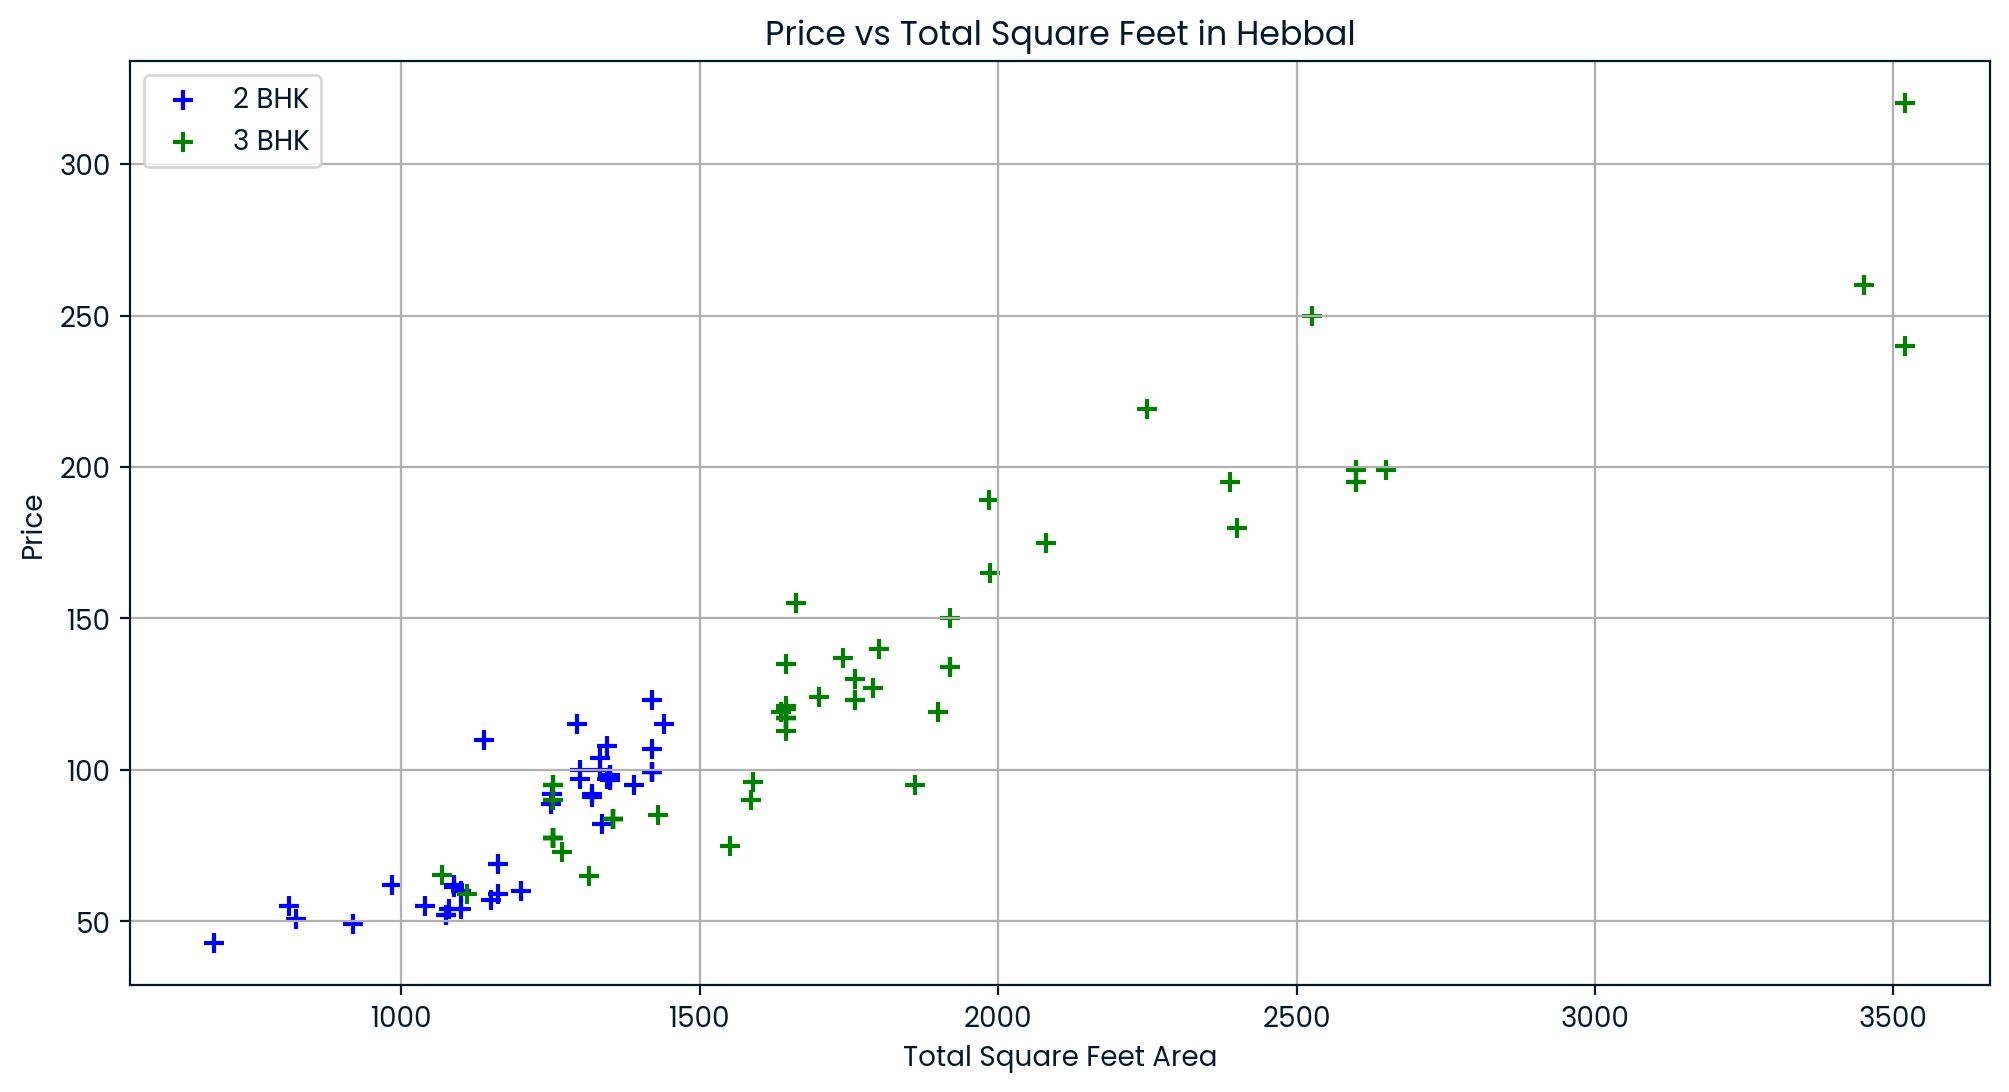

In [455]:
def plot_scatter_chart(df, location):
    # Filter the DataFrame for 2 BHK properties in the specified location
    bhk2 = df[(df.location == location) & (df.BHK == 2)]
    
    # Filter the DataFrame for 3 BHK properties in the specified location
    bhk3 = df[(df.location == location) & (df.BHK == 3)]
    
    # Set the size of the plot
    plt.figure(figsize=(12, 6))
    
    # Plot 2 BHK properties
    plt.scatter(bhk2.total_sqft, bhk2.price, marker='+', color='blue', label='2 BHK', s=50)
    
    # Plot 3 BHK properties
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    
    # Set the labels and title of the plot
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(f"Price vs Total Square Feet in {location}")
    
    # Display the legend
    plt.legend()
    
    # Display the grid
    plt.grid(True)
    
    # Show the plot
    plt.show()

# Call the function to plot the scatter chart for the specified location
plot_scatter_chart(df7, "Hebbal")

In [456]:
def remove_bhk_outliers(df):
    # Initialize an empty array to store indices of outliers
    exclude_indices = np.array([])

    # Group the DataFrame by location
    for location, location_df in df.groupby('location'):
        # Dictionary to store statistics for each BHK type within the location
        bhk_stats = {}

        # Calculate mean, standard deviation, and count of price_per_sqft for each BHK type
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }

        # Identify outliers based on the statistics of the previous BHK type
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk - 1)
            # If statistics for the previous BHK type exist and the count is greater than 5
            if stats and stats['count'] > 5:
                # Append indices of properties that are priced below the mean price_per_sqft of the previous BHK type
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)

    # Drop the identified outliers from the DataFrame
    return df.drop(exclude_indices, axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7369, 6)

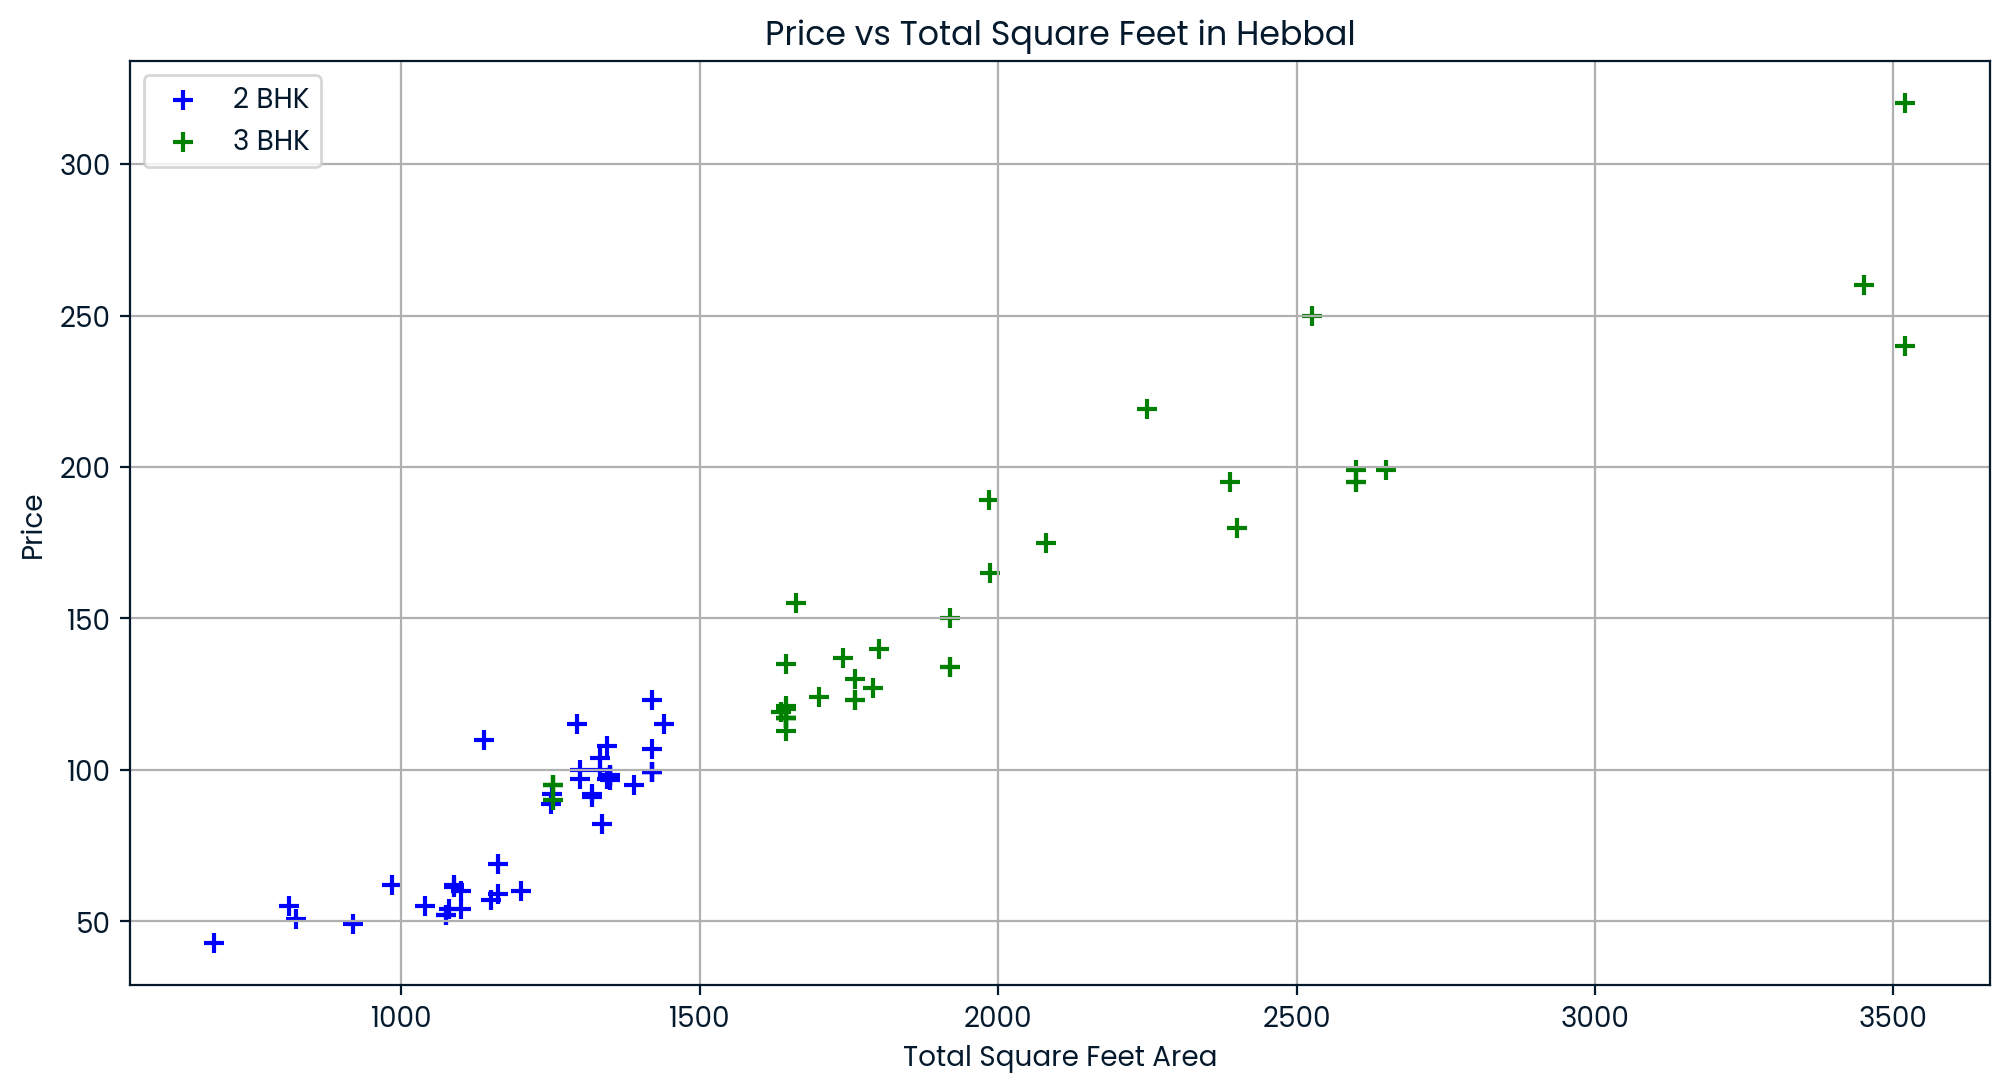

In [457]:
def plot_scatter_chart(df, location):
    # Filter the DataFrame for 2 BHK properties in the specified location
    bhk2 = df[(df.location == location) & (df.BHK == 2)]
    
    # Filter the DataFrame for 3 BHK properties in the specified location
    bhk3 = df[(df.location == location) & (df.BHK == 3)]
    
    # Set the size of the plot
    plt.figure(figsize=(12, 6))
    
    # Plot 2 BHK properties
    plt.scatter(bhk2.total_sqft, bhk2.price, marker='+', color='blue', label='2 BHK', s=50)
    
    # Plot 3 BHK properties
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    
    # Set the labels and title of the plot
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(f"Price vs Total Square Feet in {location}")
    
    # Display the legend
    plt.legend()
    
    # Display the grid
    plt.grid(True)
    
    # Show the plot
    plt.show()

# Call the function to plot the scatter chart for the specified location
plot_scatter_chart(df8, "Hebbal")

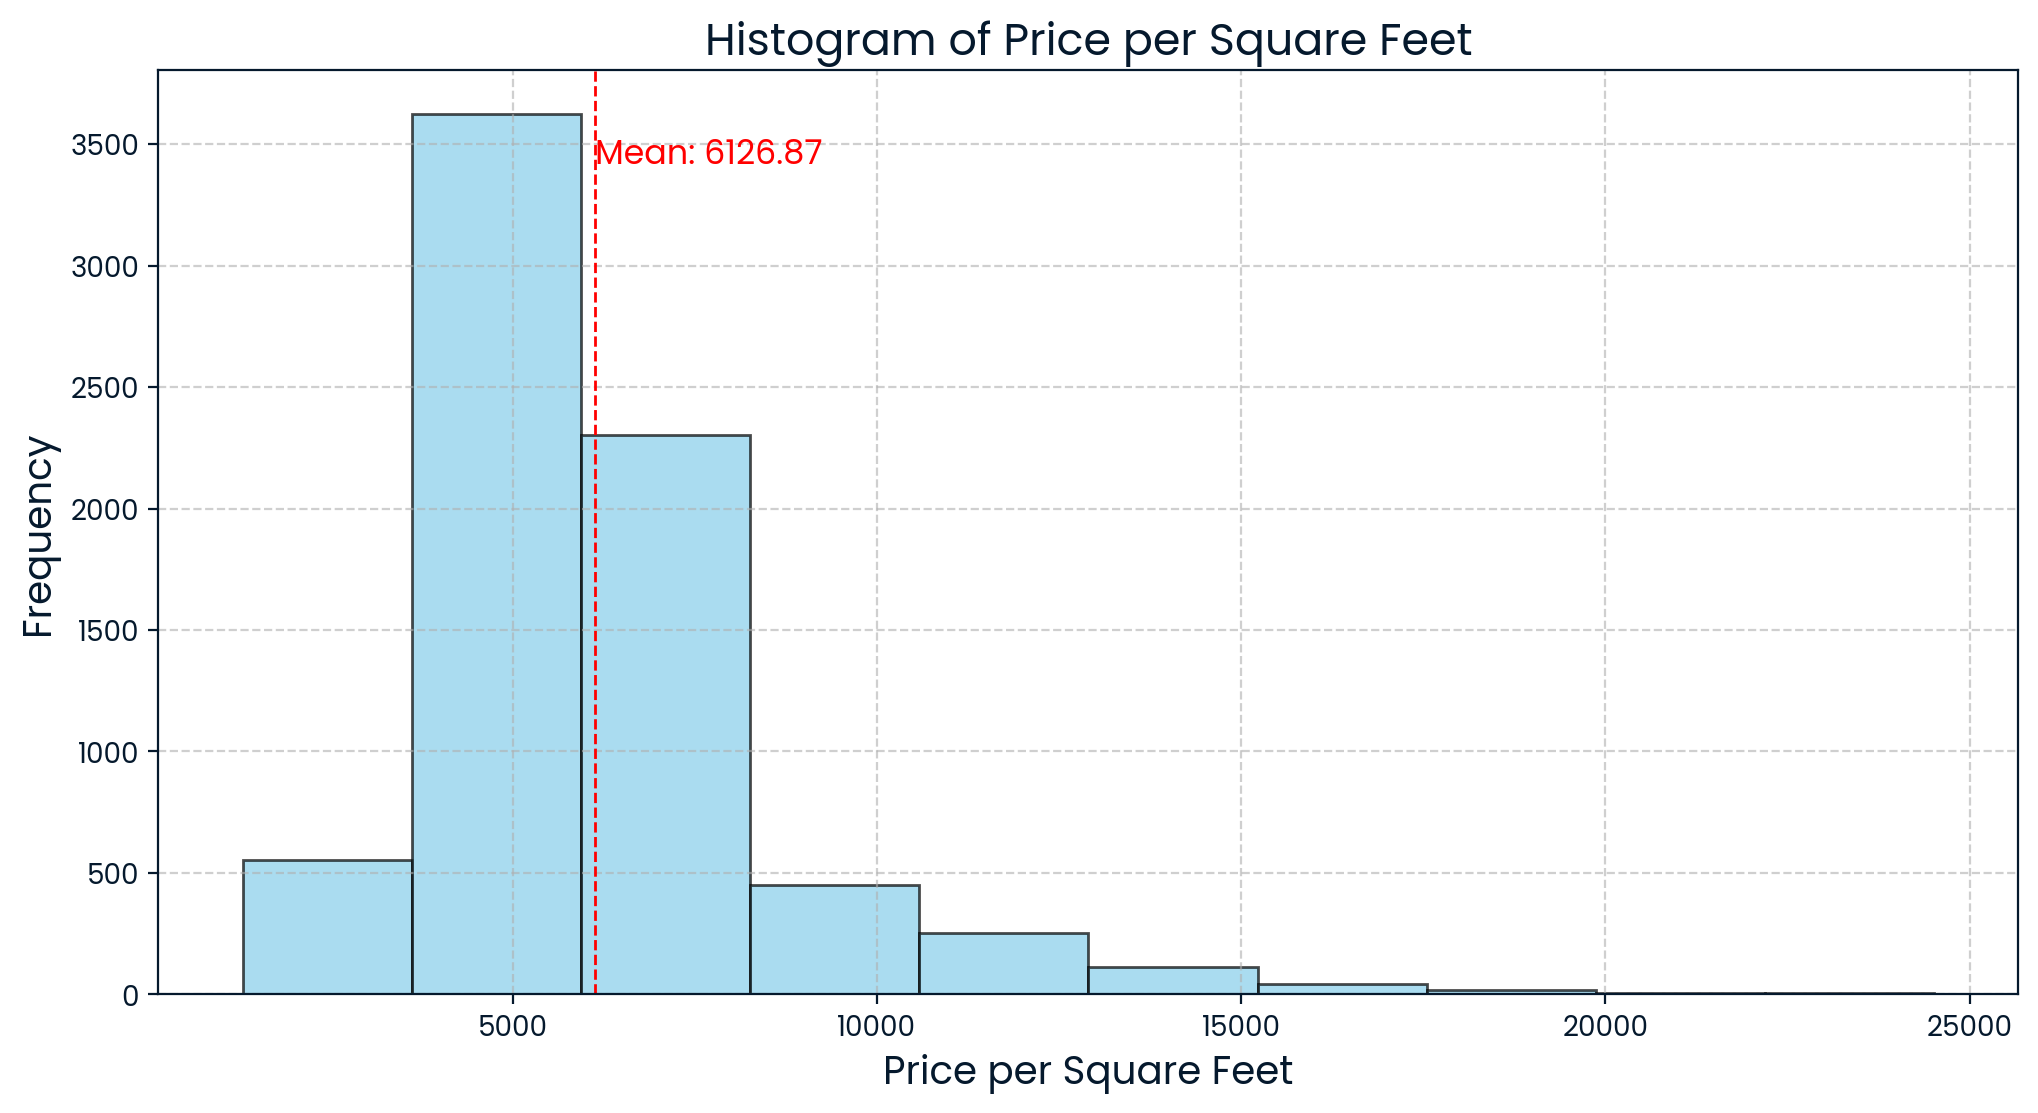

In [458]:
# Plot a histogram for price per square feet with a more professional look
plt.figure(figsize=(12, 6))

# Plot histogram with more bins for better granularity
plt.hist(df8.price_per_sqft, edgecolor='black', color='skyblue', alpha=0.7)

# Add labels and title with a professional font size
plt.xlabel("Price per Square Feet", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Histogram of Price per Square Feet", fontsize=16)

# Add grid with a lighter color and dashed lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add a vertical line for the mean price per square feet
mean_price_per_sqft = df8.price_per_sqft.mean()
plt.axvline(mean_price_per_sqft, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_price_per_sqft, plt.ylim()[1]*0.9, f'Mean: {mean_price_per_sqft:.2f}', color='red', fontsize=12)

# Show the plot
plt.show()

In [459]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [460]:
df8[df8.bath>10]

,location,total_sqft,bath,price,BHK,price_per_sqft
585,BTM 1st Stage,3300,14.0,500.0,9,15151.52
5344,Neeladri Nagar,4000,12.0,160.0,10,4000.00
5972,Other,12000,12.0,525.0,10,4375.00
6058,Other,10000,16.0,550.0,16,5500.00
6754,Other,6000,12.0,150.0,11,2500.00
7067,Other,5425,13.0,275.0,13,5069.12


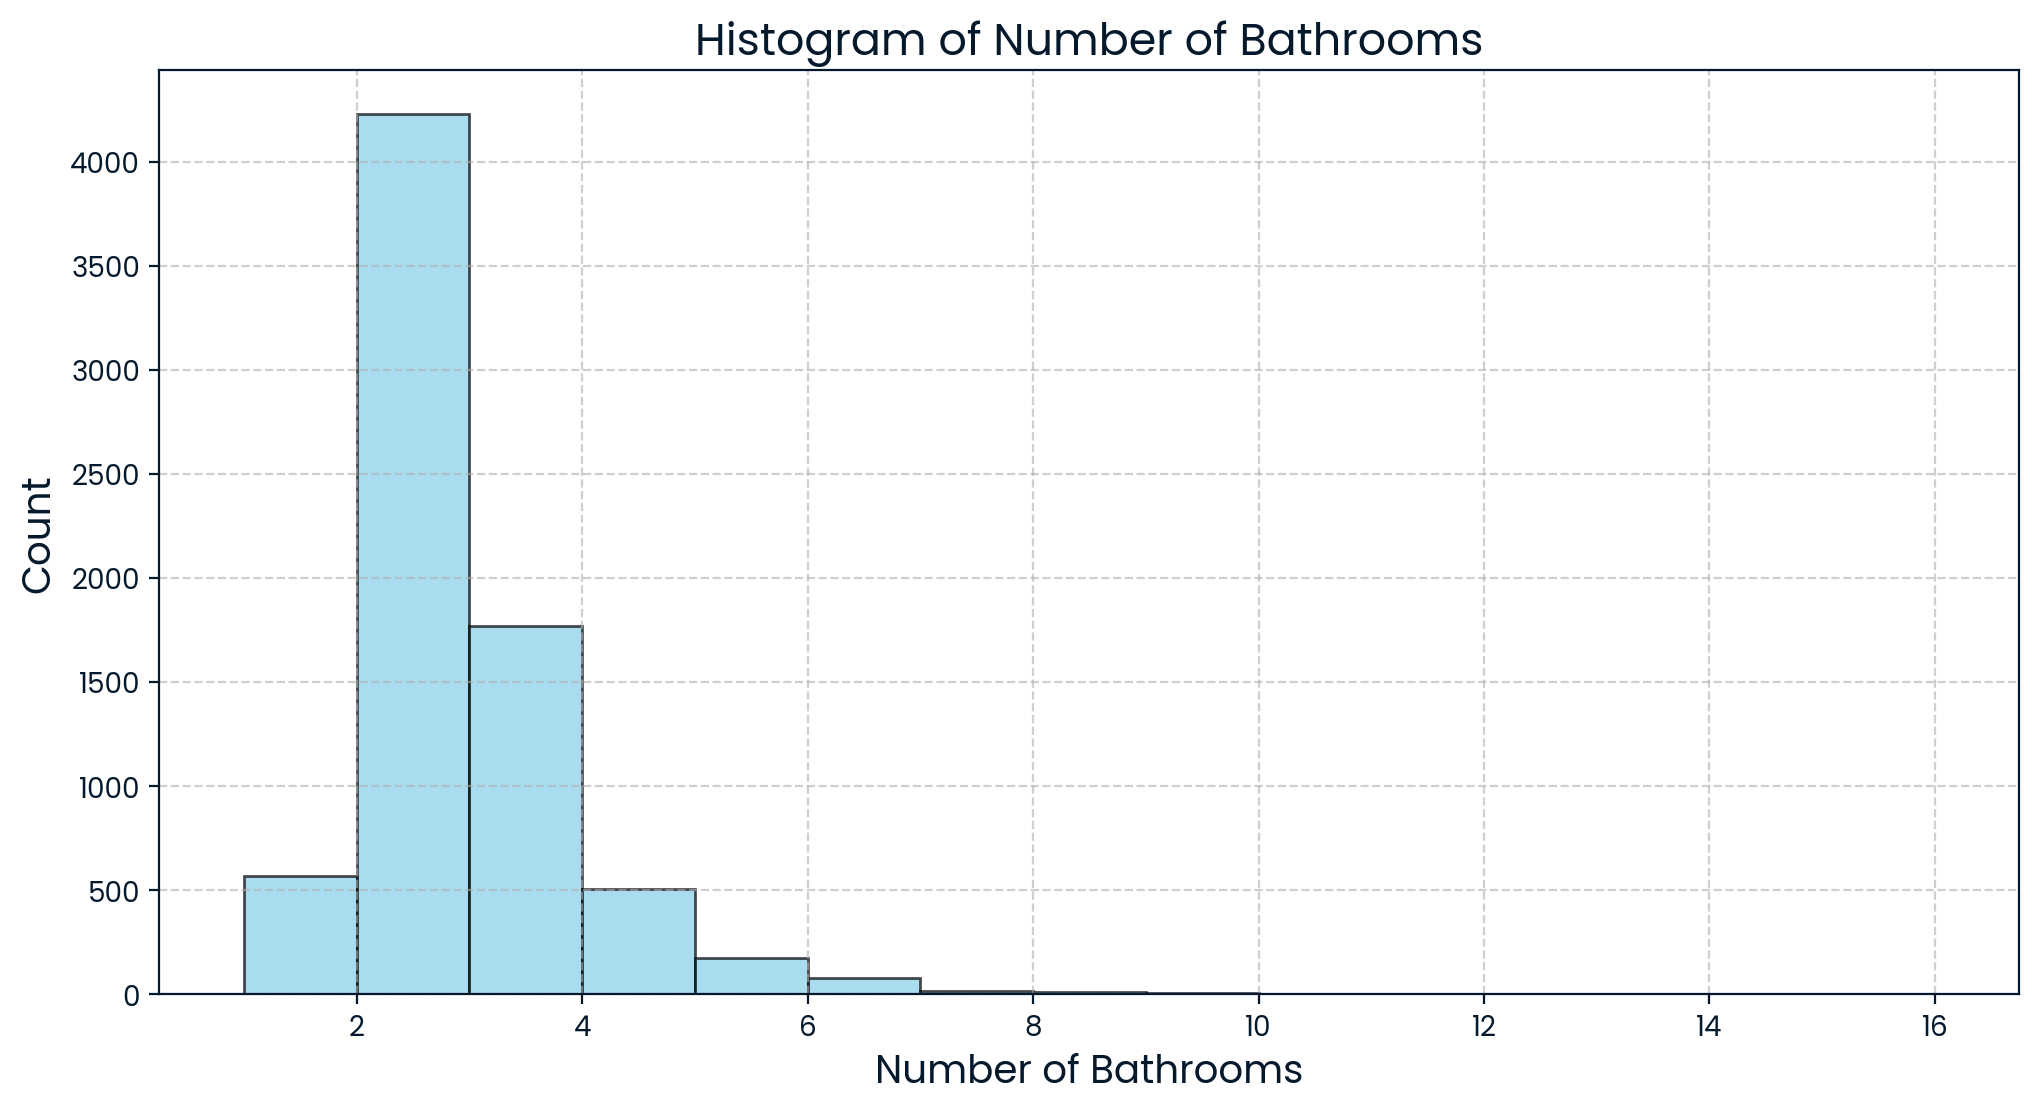

In [461]:
# Plot a histogram for the number of bathrooms
plt.figure(figsize=(12, 6))

# Plot histogram with more bins for better granularity
plt.hist(df8.bath, edgecolor='black', color='skyblue', alpha=0.7, bins=range(int(df8.bath.min()), int(df8.bath.max()) + 1))

# Add labels and title with a professional font size
plt.xlabel("Number of Bathrooms", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Histogram of Number of Bathrooms", fontsize=16)

# Add grid with a lighter color and dashed lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

In [462]:
# Filter out rows where the number of bathrooms (BATH) is more than the number of bedrooms (BHK) plus 2
df9 = df8[df8['bath'] <= df8['BHK'] + 2]

df10 = df9.drop(['price_per_sqft'], axis = 'columns')

# Build the Model

In [463]:
# Display the first 10 rows of the dataframe df10
df10.head(10)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850,4.0,428.0,4
1,1st Block Jayanagar,1630,3.0,194.0,3
2,1st Block Jayanagar,1875,2.0,235.0,3
3,1st Block Jayanagar,1200,2.0,130.0,3
4,1st Block Jayanagar,1235,2.0,148.0,2
5,1st Block Jayanagar,2750,4.0,413.0,4
6,1st Block Jayanagar,2450,4.0,368.0,4
7,1st Block Koramangala,1415,2.0,110.0,2
8,1st Block Koramangala,860,2.0,65.5,2
9,1st Block Koramangala,3000,3.0,300.0,4


In [464]:
# Generate dummy variables for the 'location' column in df10
location_dummies = pd.get_dummies(df10['location'], drop_first=True)

# Concatenate the dummy variables with the original dataframe
df11 = pd.concat([df10, location_dummies], axis=1)

# Drop the original 'location' column as it is now encoded
df11.drop(['Other'], axis='columns', inplace=True)

# Display the first few rows of the updated dataframe
df11.head()

,location,total_sqft,bath,price,BHK,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 1st Stage,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,...,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 1 HSR Layout,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850,4.0,428.0,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630,3.0,194.0,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875,2.0,235.0,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200,2.0,130.0,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235,2.0,148.0,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [465]:
# Drop the original 'location' column as it is now encoded
df12 = df11.drop(['location'], axis='columns')

# Display the first few rows of the updated dataframe
df12.head()

,total_sqft,bath,price,BHK,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 1st Stage,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,...,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 1 HSR Layout,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850,4.0,428.0,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1630,3.0,194.0,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1875,2.0,235.0,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1200,2.0,130.0,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1235,2.0,148.0,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [466]:
# Drop the 'price' column to create the feature set 'x'
x = df12.drop('price', axis = 'columns')

# Display the first 10 rows of the feature set 'x'
x.head(10)

,total_sqft,bath,BHK,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 1st Stage,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,...,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 1 HSR Layout,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850,4.0,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1630,3.0,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1875,2.0,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1200,2.0,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1235,2.0,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,2750,4.0,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [467]:
# Extract the 'price' column from df12 to create the target variable 'y'
y = df12.price

# Display the first 10 rows of the target variable 'y'
y.head(5)

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [468]:
# Split the data into training and testing sets

# Import the train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# 80% of the data will be used for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# Display the shapes of the resulting datasets
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5891, 256), (1473, 256), (5891,), (1473,))

In [469]:
# Linear Regression Model Training and Evaluation

# Import the LinearRegression model from sklearn
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
model = LinearRegression()

# Train the model using the training data
model.fit(x_train, y_train)

# Evaluate the model's performance on the test data
model.score(x_test, y_test)

0.8246257216494092

In [470]:
# Perform cross-validation using ShuffleSplit

# Import the ShuffleSplit function from sklearn
from sklearn.model_selection import ShuffleSplit

# Create a ShuffleSplit cross-validator
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

# Perform cross-validation using ShuffleSplit on the LinearRegression model
cv_scores_shuffle = cross_val_score(model, x, y, cv=shuffle_split)

# Display the cross-validation scores
cv_scores_shuffle

array([0.82462572, 0.82810326, 0.87466914, 0.89346562, 0.79503508])

In [471]:
# # Implementing other types of regression models

# # Import necessary regression models from sklearn
# from sklearn.linear_model import Ridge, Lasso
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR
# from sklearn.model_selection import cross_val_score

# # Create instances of different regression models
# ridge_model = Ridge()
# lasso_model = Lasso()
# random_forest_model = RandomForestRegressor()
# svr_model = SVR()

# # Train and evaluate Ridge Regression
# ridge_model.fit(x_train, y_train)
# ridge_score = ridge_model.score(x_test, y_test)
# ridge_cv_scores = cross_val_score(ridge_model, x, y, cv=shuffle_split)

# # Train and evaluate Lasso Regression
# lasso_model.fit(x_train, y_train)
# lasso_score = lasso_model.score(x_test, y_test)
# lasso_cv_scores = cross_val_score(lasso_model, x, y, cv=shuffle_split)

# # Train and evaluate Random Forest Regression
# random_forest_model.fit(x_train, y_train)
# random_forest_score = random_forest_model.score(x_test, y_test)
# random_forest_cv_scores = cross_val_score(random_forest_model, x, y, cv=shuffle_split)

# # Train and evaluate Support Vector Regression
# svr_model.fit(x_train, y_train)
# svr_score = svr_model.score(x_test, y_test)
# svr_cv_scores = cross_val_score(svr_model, x, y, cv=shuffle_split)

# # Display the scores
# ridge_score, ridge_cv_scores, lasso_score, lasso_cv_scores, random_forest_score, random_forest_cv_scores, svr_score, svr_cv_scores

In [472]:
# # Function to predict house price based on location, square footage, number of bathrooms, and number of bedrooms

# def predict_price(location, sqft, bath, bhk):    
#     # Find the index of the location in the feature columns
#     loc_index = np.where(x.columns == location)[0][0]

#     # Create a zero array with the same length as the number of feature columns
#     x = np.zeros(len(x.columns))
#     # Assign the input values to the corresponding positions in the array
#     x[0] = sqft
#     x[1] = bath
#     x[2] = bhk
#     # Set the location index to 1 if it exists
#     if loc_index >= 0:
#         x[loc_index] = 1

#     # Predict and return the price using the trained model
#     return model.predict([x])[0]

In [473]:
# # Function to predict house price based on location, square footage, number of bathrooms, and number of bedrooms


def predict_price(location, sqft, bath, bhk):
    global x  # Declare 'x' as global to use the previously defined DataFrame
    
    # Find the index of the location in the feature columns
    loc_index = np.where(x.columns == location)[0][0]
    
    # Create a zero array with the same length as the number of feature columns
    input_vector = np.zeros(len(x.columns))
    
    # Set the values for the input vector
    input_vector[0] = sqft
    input_vector[1] = bath
    input_vector[2] = bhk
    if loc_index >= 0:
        input_vector[loc_index] = 1
    
    # Assuming 'model' is a pre-trained model defined earlier in the notebook
    return model.predict([input_vector])[0]

# Example usage (assuming 'x' and 'model' are defined in the notebook)
# predict_price('1st Phase JP Nagar', 1000, 2, 2)

In [474]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

85.5062539045677

In [475]:
# Exporting the trained model using pickle

import pickle

# Save the model to a file
with open('house_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# The model is now saved to 'house_price_model.pkl' and can be loaded later for predictions

In [476]:
# Exporting location and column information to a file in JSON format

import json

# Save the location and column information to a file
location_columns = {
    'locations': list(x.columns[3:]),  # Assuming the first three columns are sqft, bath, and bhk
    'columns': list(x.columns)
}

with open('location_columns.json', 'w') as file:
    json.dump(location_columns, file)

# The location and column information is now saved to 'location_columns.json' and can be loaded later for predictions